# Data Analysis on NIST Fingerprint dataset

Importing libraries

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

## Selection & Pre-processing

In [34]:
df = pd.read_csv('../Fingerprint.csv')

df.head(5)

,Unnamed: 0,Gender,FingerprintType,TextFiles,ImageFiles
0,0,M,W,f0001_01.txt,f0001_01.png
1,1,M,R,f0002_05.txt,f0002_05.png
2,2,F,L,f0003_10.txt,f0003_10.png
3,3,M,R,f0004_05.txt,f0004_05.png
4,4,M,A,f0005_03.txt,f0005_03.png


* Gender - Male 'M' or Female 'F'
* Fingerprint Type - 'W' Whorl'R' Right Arch, 'L' Loop, 'T' Tented Arch, 'A' Arch
* TextFiles - Text file name
* ImageFiles - Image file name

### Selection of specified columns

In [35]:
df = df[['Gender','FingerprintType']]

df.head(10)

,Gender,FingerprintType
0,M,W
1,M,R
2,F,L
3,M,R
4,M,A
5,M,A
6,M,L
7,F,T
8,M,L
9,M,W


## Descriptive Analytics

### Gender profile

In [36]:
genders = df['Gender'].value_counts()
genders.head()


M    3250
F     750
Name: Gender, dtype: int64

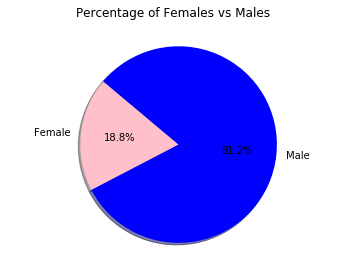

In [37]:
females = len(df[df["Gender"]=="F"])
males = len(df[df["Gender"]=="M"])
labels = ["Female","Male"]
sizes= [females,males]
colors = ['pink','blue'] 
plt.suptitle('Percentage of Females vs Males')
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

### Fingerprint Type Profiling

* W - Whorl
* T - Tented Arch
* R - Right Arch
* L - Loop
* A - Arch

In [38]:
#W T R L A
whorls = len(df[df["FingerprintType"]=="W"])
tentedArches = len(df[df["FingerprintType"]=="W"])
rightArches = len(df[df["FingerprintType"]=="R"])
loops = len(df[df["FingerprintType"]=="L"])
arches = len(df[df["FingerprintType"]=="A"])

print('No. Whorls: ' + str(whorls) + 
     '\nNo. Tented Arches: ' + str(tentedArches) +
     '\nNo. Right Arches: ' + str(rightArches) + 
     '\nNo. Loops: ' + str(loops) +
     '\nNo. Arches ' + str(arches))

No. Whorls: 800
No. Tented Arches: 800
No. Right Arches: 800
No. Loops: 800
No. Arches 800


Average number of fingerprints per fingerprint type

In [39]:
df["FingerprintType"].value_counts().mean()

800.0

Mode of fingerprint Types Number

In [40]:
df["FingerprintType"].value_counts().mode()

0    800
dtype: int64

Minimum number of finger print types

In [41]:
df["FingerprintType"].value_counts().min()

800

Maximum number of finger print types

In [42]:
df["FingerprintType"].value_counts().max()

800

Pie Chart of fingerprint types

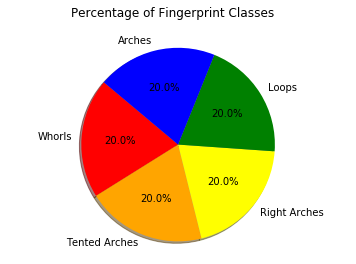

In [43]:
labels = ["Whorls","Tented Arches", "Right Arches", "Loops", "Arches"]
sizes= [whorls, tentedArches, rightArches, loops, arches]
colors = ['red','orange','yellow','green','blue']
plt.suptitle('Percentage of Fingerprint Classes')
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()


## Visualisation of Fingerprint Types

Arch

![Arch](../fingerprintsdataset/train/arch/arch.0.png)


Loop

![Loop](../fingerprintsdataset/train/loop/loop.0.png)

Right Arch

![RightArch](../fingerprintsdataset/train/rightArch/rightArch.0.png)

Tented Arch

![TentedArch](../fingerprintsdataset/train/tentedArch/tentedArch.0.png)

Whorl

![Whorl](../fingerprintsdataset/train/whorl/whorl.0.png)

Histogram of Fingerprint Types

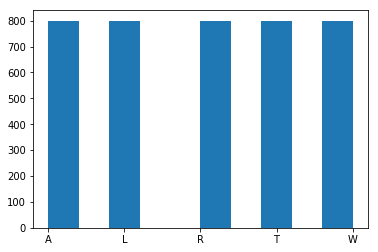

In [44]:
plt.hist(df['FingerprintType'])
plt.show()

### Histogram of Fingerprint types for each gender

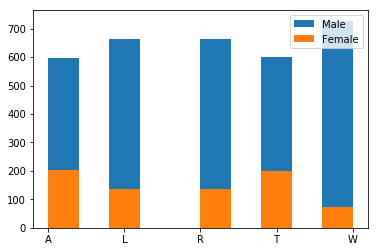

In [45]:
plt.hist(df[df["Gender"]=="M"]["FingerprintType"].reset_index(drop=True), label="Male")
plt.hist(df[df["Gender"]=="F"]["FingerprintType"].reset_index(drop=True), label="Female")
plt.legend()
plt.show()

Most common fingerprint type for female

In [46]:
df[df["Gender"]=="F"]["FingerprintType"].mode()

0    A
dtype: object

Most common fingerprint type for a male

In [47]:
df[df["Gender"]=="M"]["FingerprintType"].mode()

0    W
dtype: object

## Predictive Analysis

### Multi layer perceptron to predict a fingerprint type

In [48]:
X = df[['Gender']]


X = pd.get_dummies(X)

Y = df['FingerprintType']

le = preprocessing.LabelEncoder()

le.fit(Y)
le.classes_


X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)

scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)
print(predictions)
print(predictions[0:5])
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

['T' 'W' 'W' ..., 'W' 'T' 'W']
['T' 'W' 'W' 'W' 'T']
[[  0   0   0  68 176]
 [  0   0   0  40 196]
 [  0   0   0  47 195]
 [  0   0   0  61 176]
 [  0   0   0  16 225]]
             precision    recall  f1-score   support

          A       0.00      0.00      0.00       244
          L       0.00      0.00      0.00       236
          R       0.00      0.00      0.00       242
          T       0.26      0.26      0.26       237
          W       0.23      0.93      0.37       241

avg / total       0.10      0.24      0.13      1200



C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
